## Operador de índices de Vegetacão e Máscaras de imagem

A principio o diretório possui módulos de:

- DataProcessor = classes para obter bandas de imagens tiff (**ImageProcessor**) e criacão de máscaras através de arrays de binários (**MaskOperator**)
  
- Statistics = classes para se obter organizacão de dicionarios das imagens do diretório (**Statics**) e cálculo do teste Z (**Statistics**)

In [1]:
from dataprocessor.imageprocessor import ImageProcessor
from dataprocessor.calcuateindex import IndexCalculator
from dataprocessor.maskoperator import MaskOperator
from statistics.statistics import DictionaryCreator
from statistics.statistics import Statistics
from statistics.statistics import LoadData
import matplotlib.pyplot as plt
import numpy as np
import rasterio

Dessa forma é posível chamar métodos para calcular índices vegetativos como usando o módulo **dataprocessor.calculateindex**  e o prefixo get_"nome do indice":
- NDVI
- NDWI
- NDRE
- RVI
- GRVI
- GNDVI

Assim com o MaskOperator selecione a máscara desejada da imagem TIFF (anteriormente processada pela nossa producão)

obs: a imagem deverá conter nas descriptions os nomes de máscara desejados (cloud, shadow, soil)

### Ex:

In [2]:
teste = rasterio.open('../imgs-ex/tiffs/Água Quente_Região Norte_50_2023-01-25_13-58-12_analytic_8b.tif')
ndvi = IndexCalculator.get_ndvi(teste)

label_path = '../imgs-ex/labels/Água Quente_Região Norte_50_2023-01-25_13-58-12_analytic_8b.npy'
label = np.load(label_path)

cloud = MaskOperator.select_mask(ndvi, label, "cloud")
shadow = MaskOperator.select_mask(ndvi, label, "shadow")
soil = MaskOperator.select_mask(ndvi, label, "soil")

mask_cloud = (cloud != 0) & (~np.isnan(cloud))
mask_shadow = (shadow != 0) & (~np.isnan(shadow))
mask_soil = (soil != 0) & (~np.isnan(soil))

soil[mask_soil]

array([0.65481918, 0.65480938, 0.66174369, ..., 0.78061737, 0.7754376 ,
       0.77636054])

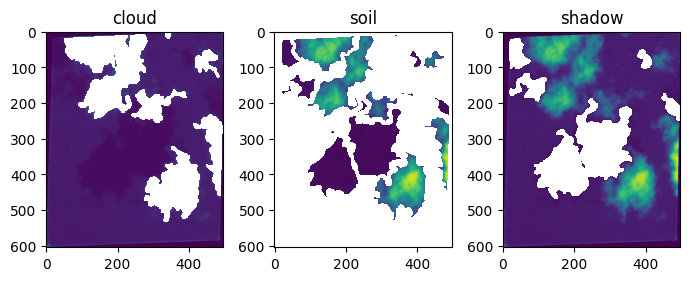

In [3]:
import numpy as np
raster_path = '../imgs-ex/inputs/Água Quente_Região Norte_50_2023-01-25_13-58-12_analytic_8b.npy'
label_path = '../imgs-ex/labels/Água Quente_Região Norte_50_2023-01-25_13-58-12_analytic_8b.npy'

raster = np.load(raster_path)
label = np.load(label_path)
mask_cloud = MaskOperator.select_mask(raster, label, mask = "cloud")
mask_soil = MaskOperator.select_mask(raster, label, mask = "soil")
mask_shadow = MaskOperator.select_mask(raster, label, mask = "shadow")

def plot_raster_band(cloud: np.array, soil: np.array, shadow: np.array, cmap: str):
    fig, ax = plt.subplots(1,3,figsize=(7, 7))

# plotando
    ax[0].imshow(cloud, cmap=cmap)
    ax[0].set_title('cloud')
    ax[1].imshow(soil, cmap=cmap)
    ax[1].set_title('soil')
    ax[2].imshow(shadow, cmap=cmap)
    ax[2].set_title('shadow')
    plt.tight_layout()
    plt.show()


plot_raster_band(cloud = mask_cloud[:,:,0], soil = mask_soil[:,:,0], shadow = mask_shadow[:,:,0], cmap= None)

Utilizando o **DictionaryCreator** através do método get_index_dict( ) é possível criar estruturas de dicionarios capazes de serem levados para calculos mais complexos

Utilizando concatenate como fator para criar dicionários do conjunto das imagens ou não:

```python

dict = dictionary_instance.get_index_dict(folder_path, concatenate = False)
dict = {
    IndexA: [img1, img2, ...], IndexB: [img1, img2, img3]
    }


dict = dictionary_instance.get_index_dict(folder_path, concatenate = True)
dict = {
    IndexA: [np.concatenate(img1 img2 img3)], IndexB: [np.concatenate(img1 img2 img3)]
    }

```


In [3]:
raster_path = '../imgs-ex/inputs/'

statistics_instance = DictionaryCreator(raster_path)
soil_values, cloud_values, shadow_values = statistics_instance.get_index_dict(raster_path, concatenate= True)

Statistics.calc_index_z( ) retorna um dicionário com chaves dos respectivos indices estudados

```python

soil, cloud, shadow = Statistics.calc_index_z(img_path)

soil = {
    IndexA: [ Z_value ], IndexB: [ Z_value ], IndexC: [ Z_value ]
}

```

In [6]:
z_soil_x_clouds, z_soil_x_shadows, z_shadow_x_clouds = Statistics.calc_index_z(img_path= raster_path)